In [1]:
# using GuSTO"
include("../src/GuSTO.jl")

┌ Info: Precompiling BulletCollision [b3564421-7037-56b3-90f4-5b7f54e2ead3]
└ @ Base loading.jl:1192


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/75259c676c4c94b02ca26a89265c53e5a244a54a-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/75259c676c4c94b02ca26a89265c53e5a244a54a-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Forest

In [2]:
robot = Astrobee3D()
model = AstrobeeSE3Manifold()
env = ISSCorner();

N = 50
tf_guess = 10.
goal_set = GoalSet()

add_obstacles!(env)

# Small corner maneuver
r_init = [11.2; -0.8; 5.6]
r_goal = [10.9; 3.0; 5.0]

q_init = [1.; 0.; 0.; 0.]
# q_goal = [1.; 0.; 0.; 0.]
# q_goal = [1.; 0.5; 0.5; 0.5]
q_goal = [1.; 0.2; 0.3; 0.4]
q_goal = q_goal/norm(q_goal)

x_init = [r_init; zeros(3); q_init; zeros(3)]
v_goal = zeros(3)
ω_goal = zeros(3)

x_goal = [r_goal; v_goal; q_goal; ω_goal]
# add_goal!(goal_set, Goal(PointGoal(x_goal), tf_guess, model))

ε = 1e-4
add_goal!(goal_set, Goal(PointGoal(r_goal), tf_guess, 1:3))
add_goal!(goal_set, Goal(PointGoal(v_goal), tf_guess, 4:6))
add_goal!(goal_set, Goal(BoxGoal(q_goal.-ε, q_goal.+ε), tf_guess, 7:10))
# add_goal!(goal_set, Goal(PointGoal(q_goal), tf_guess, 7:10))
add_goal!(goal_set, Goal(PointGoal(ω_goal), tf_guess, 11:13))

PD = ProblemDefinition(robot, model, env, x_init, goal_set);
TOP = TrajectoryOptimizationProblem(PD, N, tf_guess, fixed_final_time=true)
TOS_SCP = TrajectoryOptimizationSolution(TOP)

solve_SCP!(TOS_SCP, TOP, solve_gusto_jump!, init_traj_straightline, "Ipopt", print_level=0)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



In [3]:
@show TOS_SCP.SCPS.converged
@show TOS_SCP.SCPS.iterations
@show TOS_SCP.SCPS.total_time
@show TOS_SCP.SCPS.accept_solution
@show TOS_SCP.SCPS.solver_status
@show TOS_SCP.SCPS.scp_status
@show TOS_SCP.SCPS.convergence_measure
@show TOS_SCP.SCPS.param.alg.ω_vec
@show TOS_SCP.SCPS.param.alg.Δ_vec
@show TOS_SCP.SCPS.J_true
@show TOS_SCP.SCPS.dual
;

(TOS_SCP.SCPS).converged = true
(TOS_SCP.SCPS).iterations = 7
(TOS_SCP.SCPS).total_time = 45.074505128
(TOS_SCP.SCPS).accept_solution = Bool[true, true, true, true, true, true, true, true]
(TOS_SCP.SCPS).solver_status = Union{TerminationStatusCode, Symbol}[:NA, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED]
(TOS_SCP.SCPS).scp_status = Symbol[:NA, :ViolatesConstraints, :ViolatesConstraints, :ViolatesConstraints, :OK, :OK, :OK, :OK]
(TOS_SCP.SCPS).convergence_measure = [0.0, 0.0688753, 0.00388088, 0.0030732, 0.0110116, 0.000427816, 1.40182e-5, 5.6762e-7]
(((TOS_SCP.SCPS).param).alg).ω_vec = [1.0, 5.0, 25.0, 125.0, 125.0, 125.0, 125.0, 125.0]
(((TOS_SCP.SCPS).param).alg).Δ_vec = [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
(TOS_SCP.SCPS).J_true = Any[0.0, 62.2831, 63.0013, 64.4436, 99.1265, 98.8738, 98.8771, 98.8775]
(TOS_SCP.SCPS).dual = [-1.28574, 655.518, -133.94, -10.2259, 3295.77, -672.769, 0.0001592

In [4]:
@show TOS_SCP.SCPS.converged
@show TOS_SCP.SCPS.iterations
@show TOS_SCP.SCPS.total_time
@show TOS_SCP.SCPS.accept_solution
@show TOS_SCP.SCPS.solver_status
@show TOS_SCP.SCPS.scp_status
@show TOS_SCP.SCPS.convergence_measure
@show TOS_SCP.SCPS.param.alg.ω_vec
@show TOS_SCP.SCPS.param.alg.Δ_vec
@show TOS_SCP.SCPS.J_true
@show TOS_SCP.SCPS.dual
;

(TOS_SCP.SCPS).converged = true
(TOS_SCP.SCPS).iterations = 7
(TOS_SCP.SCPS).total_time = 45.074505128
(TOS_SCP.SCPS).accept_solution = Bool[true, true, true, true, true, true, true, true]
(TOS_SCP.SCPS).solver_status = Union{TerminationStatusCode, Symbol}[:NA, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED, LOCALLY_SOLVED]
(TOS_SCP.SCPS).scp_status = Symbol[:NA, :ViolatesConstraints, :ViolatesConstraints, :ViolatesConstraints, :OK, :OK, :OK, :OK]
(TOS_SCP.SCPS).convergence_measure = [0.0, 0.0688753, 0.00388088, 0.0030732, 0.0110116, 0.000427816, 1.40182e-5, 5.6762e-7]
(((TOS_SCP.SCPS).param).alg).ω_vec = [1.0, 5.0, 25.0, 125.0, 125.0, 125.0, 125.0, 125.0]
(((TOS_SCP.SCPS).param).alg).Δ_vec = [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
(TOS_SCP.SCPS).J_true = Any[0.0, 62.2831, 63.0013, 64.4436, 99.1265, 98.8738, 98.8771, 98.8775]
(TOS_SCP.SCPS).dual = [-1.28574, 655.518, -133.94, -10.2259, 3295.77, -672.769, 0.0001592

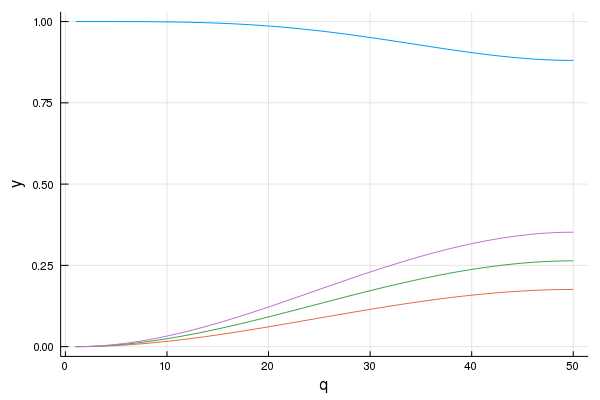

In [5]:
using Plots
gr(fmt=:png)
plot()
for i = 7:10
    plot!([collect(1:N)],[TOS_SCP.SCPS.traj.X[i,:]],
        xlabel = "q",
        ylabel = "y",
        legend = :none)
end
plot!()

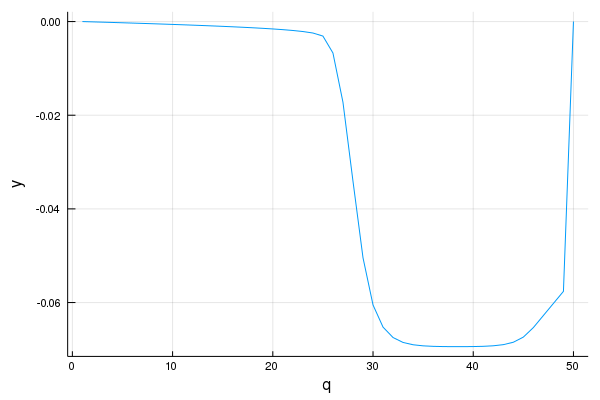

In [6]:
gr(fmt=:png)
plot()
plot!([collect(1:N)],[TOS_SCP.SCPS.traj.X[4,:]],
    xlabel = "q",
    ylabel = "y",
    legend = :none)

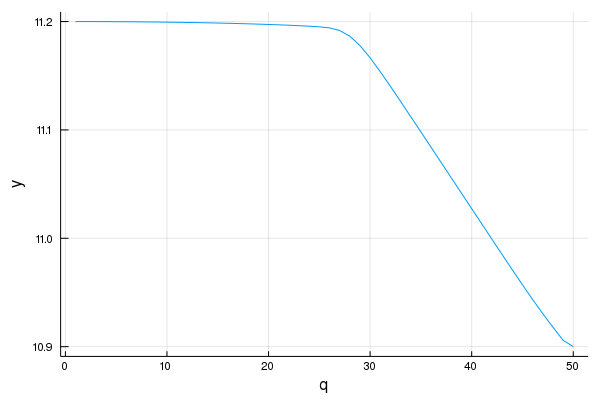

In [7]:
gr(fmt=:png)
plot()
plot!([collect(1:N)],[TOS_SCP.SCPS.traj.X[1,:]],
    xlabel = "q",
    ylabel = "y",
    legend = :none)

In [8]:
using AstrobeeRobot

# Animate Astrobee trajectory
vis = Visualizer()
delete!(vis)

vis[:goal]
for (idx,obs) in enumerate(env.keepout_zones)
    setobject!(vis[:goal][:goal], 
        Object(HyperSphere(Point3f0(x_goal[1:3]), 0.1f0),
            MeshBasicMaterial(color=RGBA(0,1.0,0.,0.3))))
end

vis[:workspace]
for (idx,ws) in enumerate(env.keepin_zones)
    if idx in (5,8)
        setobject!(vis[:workspace][Symbol(string("ws",idx))],
            Object(ws, MeshBasicMaterial(color=RGBA(0.95,0.93,0.26,0.3), depthWrite=false)))
    else
        setobject!(vis[:workspace][Symbol(string("ws",idx))],
            Object(ws, MeshBasicMaterial(color=RGBA(0.95,0.93,0.26,0.3))))
    end
end

vis[:obstacle]
for (idx,ws) in enumerate(env.obstacle_set)
    setobject!(vis[:workspace][Symbol(string("ws",idx+length(env.keepin_zones)))],
        Object(ws,MeshBasicMaterial(color=RGBA(0.95,0.26,0.26,0.3))))
end

ab = Astrobee()
mvis = MechanismVisualizer(
    ab.mechanism,
    URDFVisuals(AstrobeeRobot.urdfpath(), package_path=[dirname(dirname(AstrobeeRobot.urdfpath()))]),
    vis);

speed_factor = 3

Qs = Vector{Vector{Float64}}()
for k in 1:speed_factor:N
#     q = [quat_inv(TOS_SCP.SCPS.traj.X[7:10,k]); TOS_SCP.SCPS.traj.X[1:3,k]]
    q = [quat_inv(TOS_SCP.SCPS.traj.X[7:10,k]); TOS_SCP.SCPS.traj.X[1:3,k]]
    push!(Qs,q)
end

trans = Translation(14., -1., 7.)
rot = LinearMap(RotZ(-0.6)) ∘ LinearMap(RotY(-0.2))
settransform!(vis["/Cameras/default"], trans ∘ rot)
setprop!(vis["/Cameras/default/rotated/<object>"], "zoom", 1.9)
setprop!(vis["/Cameras/default/rotated/<object>"], "near", 0.05)

sleep(3)
setanimation!(mvis,1:length(Qs),Qs)

plot_in_cell = false
plot_in_cell ? IJuliaCell(vis) : open(vis)

instantiated a floating joint


┌ Info: Serving MeshCat visualizer at http://127.0.0.1:8700
└ @ MeshCat /home/somrita/.julia/packages/MeshCat/WlA0B/src/servers.jl:24


Process(`xdg-open http://127.0.0.1:8700`, ProcessExited(0))

Opening in existing browser session.


┌ Error: error handling request
│   exception = (ArgumentError("stream is closed or unusable"), Base.StackTraces.StackFrame[check_open at stream.jl:252 [inlined], uv_write_async(::TCPSocket, ::Ptr{UInt8}, ::UInt64) at stream.jl:800, uv_write(::TCPSocket, ::Ptr{UInt8}, ::UInt64) at stream.jl:774, unsafe_write(::TCPSocket, ::Ptr{UInt8}, ::UInt64) at stream.jl:830, unsafe_write at ConnectionPool.jl:134 [inlined], macro expansion at gcutils.jl:87 [inlined], write at io.jl:164 [inlined], closebody at Streams.jl:111 [inlined], closewrite(::Stream{Request,Transaction{TCPSocket}}) at Streams.jl:126, (::##13#14{#_servercoroutine#11{ServerWS},Transaction{TCPSocket},Stream{Request,Transaction{TCPSocket}}})() at task.jl:259])
└ @ HTTP.Servers /home/somrita/.julia/packages/HTTP/wY7Vc/src/Servers.jl:364
